### FAKE AND REAL NEWS DETECTION      

##### SUBMITTED BY - HANGSAJYOTI DHAR, 170310007020

In [1]:
# importing packages
import numpy as np
import pandas as pd

In [2]:
#loading dataset 
data = pd.read_csv("news.csv")

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data.shape

(6335, 4)

In [5]:
# changing the labels of data from real or fake to 1 or 0 respectievly
data.loc[data["label"]=="FAKE" , "label"]=0
data.loc[data["label"]=="REAL" , "label"]=1

In [6]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [7]:
data2 = data[0:2000]   #taking 2000 news data from the total data for detection 

In [8]:
data2 = data2.dropna()

In [9]:
x = data2.iloc[:,:-1].values
y = data2.iloc[:,-1].values # extracting only the lable and storing it in y

In [10]:
from sklearn.feature_extraction.text import CountVectorizer # tokenizing of text document for predictive modeling 

In [18]:
cv= CountVectorizer(max_features=5000)

In [19]:
mat_body= cv.fit_transform(x[:,2]).todense()

In [20]:
mat_body

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
cv_head = CountVectorizer(max_features=5000)
mat_head = cv_head.fit_transform(x[:,1]).todense()

In [22]:
mat_head

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
x_mat = np.hstack(( mat_head, mat_body))

In [24]:
x_mat

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
#as we have the data in numerical format we will divide the data in train and test set
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_mat, y, test_size=0.2, random_state=0)#80% in train set, 20% in test set

In [27]:
x_train = x_train.astype(int)
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
y_train = y_train.astype(int)
print(y_train)

[0 0 1 ... 0 0 1]


In [29]:
x_test = x_test.astype(int)
print(x_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
y_test = y_test.astype(int)
print(y_test)

[1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1
 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0
 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0
 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0
 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1]


#### using random forest classifer for classifying

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
dect = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=7)

In [44]:
dect1=dect.fit(x_train, y_train)

In [45]:
pred = dect1.predict(x_test)

In [46]:
print(pred)

[1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0
 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1
 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0
 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0]


In [47]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)  #prediction percentage of the model
print(str(acc*100) + " % " + "accuracy in detection of fake and real news")

81.5 % accuracy in detection of fake and real news


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, pred)

array([[190,  14],
       [ 60, 136]], dtype=int64)

<Figure size 432x288 with 0 Axes>

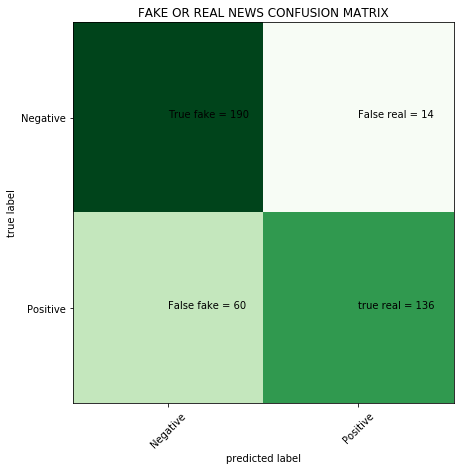

In [50]:
import matplotlib.pyplot as plt       #plotting the confusion matrix to realize the true and false fake or real
cm = confusion_matrix(y_test, pred)
plt.clf()
plt.figure(figsize=(7,7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
classNames = ['Negative', 'Positive']
plt.title('FAKE OR REAL NEWS CONFUSION MATRIX')
plt.ylabel('true label')
plt.xlabel('predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['True fake','False real'],['False fake','true real']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ " = "+str(cm[i][j]))
plt.show()

In [51]:
print("FAKE AND REAL NEWS DETECTED IN THE TEST SET\n")
print("True fake news detected in the test set : ",cm[0][0])
print("True real news detected in the test set : ",cm[1][1])
print("False fake news detected in the test set: ",cm[1][0])
print("False real news detected in the test set: ",cm[0][1])

FAKE AND REAL NEWS DETECTED IN THE TEST SET

True fake news detected in the test set :  190
True real news detected in the test set :  136
False fake news detected in the test set:  60
False real news detected in the test set:  14
